## Columns 
* name - definition - type
* case_id - uswtdb id - Numeric
* faa_ors - unique identifier for each turbine for cross-reference to the faa digital obstacle files (faa dof ) - String
* faa_asn - obstruction evaluation airport airspace analysis (oe-aaa) aeronautical study number (asn) - String
* usgs_pr_id - unique, stable object number for cross-reference - Numeric
* t_state - US State - String
* t_county - US County - String
* t_fips - state and county fips (a 5 digit code) where turbine is located, based on spatial join of turbine points with US state and county shapefile. - Numeric
* p_name - Wind project name - String
* p_year - Year wind project online - Numeric
* p_tnum - number of turbines in the wind power project - Numeric
* p_cap - Project total capacity - Numeric
* t_manu - Turbine manufacturer - String
* t_model - Turbine model - String
* t_cap - Turbine capacity [kW] - Numeric
* t_hh - Turbine hub height [m] - Numeric
* t_rd - Turbine rotor diameter [m] - Numeric
* t_rsa - Turbine rotor swept area [m2] - Numeric
* t_ttlh - Turbine tip height [m] - Numeric
* t_conf_atr - Level of confidence in the turbine's attributes, from low to high - Numeric
* t_conf_loc - Level of confidence in turbine location, from low to high - Numeric
* t_img_date - date of image used to visually verify turbine location (note if NAIP is the image source the month and day were set to 01/01) - DateTime
* t_img_srce - source of image used to visually verify turbine location - String
* xlong - Turbine latitude - Numeric
* ylat - Turbine longitude - Numeric

In [38]:
import pandas as pd
import numpy as np

wind = pd.read_csv('uswtdb_v1_0_20180419.csv') 

# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')


wind_set = wind[['t_state','p_name','p_year','t_manu','t_model','t_cap','p_cap','t_rd','xlong','ylat']]
wind_set_decadeA = wind_set.query('p_year>2016')

# wind.shape (57636, 24)
# wind.dtypes.sample(10)
# wind.shape

# wind_new = wind.drop(wind.columns[[1, 2]], axis=1, inplace=True)
# wind_state_encoded = pd.get_dummies(wind_set)
# wind_set_decadeA.head()
wind_set_decadeA.shape

(3662, 10)

In [11]:
wind_set.dropna().describe()

,p_year,t_cap,p_cap,t_rd
count,57636.000000,57636.000000,57636.000000,57636.000000
mean,1983.664064,1019.504997,-395.576543,-815.673393
std,531.182367,2686.506833,2262.213695,2872.746063
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,2006.000000,1500.000000,61.000000,70.000000
50%,2009.000000,1600.000000,118.500000,82.500000
75%,2013.000000,2000.000000,198.000000,100.000000
max,2018.000000,6000.000000,495.010000,150.000000


In [29]:
# wind_set_decade = wind_set.query('p_year>2007')
# wind_set_decade = wind_set.filter(lambda x: x['p_year'] > 2010.)
#
wind_groupby_year = wind_set.groupby('p_year').count()
wind_set_decade = wind_groupby_year.query('p_year>2009')
wind_set_decade.head()
# print ("Skew is:", wind_set_decade.t_cap.skew())
# wind_set_decade.columns

,t_state,p_name,t_manu,t_model,t_cap,p_cap,t_rd,xlong,ylat
p_year,,,,,,,,,
2010,2956,2956,2956,2956,2956,2956,2956,2956,2956
2011,3511,3511,3511,3511,3511,3511,3511,3511,3511
2012,6775,6775,6775,6775,6775,6775,6775,6775,6775
2013,616,616,616,616,616,616,616,616,616
2014,2520,2520,2520,2520,2520,2520,2520,2520,2520


In [48]:
grouped = wind_set.groupby('p_year')
len(grouped)

37

In [13]:
numeric_features = wind_set.select_dtypes(include=[np.number])
# numeric_features.dtypes
corr = numeric_features.corr()

print (corr['t_cap'].sort_values(ascending=False)[:5], '\n')
print (corr['t_cap'].sort_values(ascending=False)[-5:])

t_cap     1.000000
p_cap     0.967510
t_rd      0.781157
p_year    0.050224
Name: t_cap, dtype: float64 

t_cap     1.000000
p_cap     0.967510
t_rd      0.781157
p_year    0.050224
Name: t_cap, dtype: float64


In [14]:

target = wind_set.p_cap

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

def get_mae(X, y):
    # multiple by -1 to make positive MAE score instead of neg value returned as sklearn convention
    return -1 * cross_val_score(RandomForestRegressor(50), 
                                X, y, 
                                scoring = 'neg_mean_absolute_error').mean()

# drops categoricals 
# predictors_without_categoricals = train_predictors.select_dtypes(exclude=['object'])
# mae_without_categoricals = get_mae(predictors_without_categoricals, target)

mae_one_hot_encoded = get_mae(wind_state_encoded, target)

# print('Mean Absolute Error when Dropping Categoricals: ' + str(int(mae_without_categoricals)))
print('Mean Abslute Error with One-Hot Encoding: ' + str(int(mae_one_hot_encoded)))



NameError: name 'wind_state_encoded' is not defined

In [4]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 10)

# I should see the distrubution of the year that turbines went online
 
print ("Skew is:", wind_set.p_year.skew())
plt.hist(wind_set.p_year, color='gold')
plt.show()

Skew is: -22.507854997262992


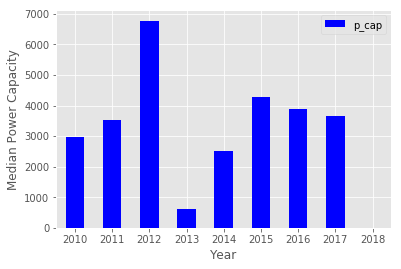

In [32]:
condition_pivot = wind_set_decade.pivot_table(index='p_year',
                                    values='p_cap', aggfunc=np.median)

condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Year')
plt.ylabel('Median Power Capacity')
plt.xticks(rotation=0)
plt.show()

In [35]:
data = {'name': ['Alice', 'Bob', 'Charles', 'David', 'Eric'],
        'year': [2010, 2012, 2013, 2014, 2015],
        'salary': [40000, 24000, 31000, 20000, 30000]}
 
df = pd.DataFrame(data, index = ['Samsung', 'Facebook', 'Apple', 'Microsoft', 'Google'])
df_filtered = df.query('year>2011')
print(df_filtered)

              name  salary  year
Facebook       Bob   24000  2012
Apple      Charles   31000  2013
Microsoft    David   20000  2014
Google        Eric   30000  2015


In [38]:
grouped = df.groupby('year')
salary_group = grouped.filter(lambda x: x['salary'].mean() > 24000.)
salary_group.head()

,name,salary,year
Samsung,Alice,40000,2010
Facebook,Bob,24000,2012
Apple,Charles,31000,2013
Google,Eric,30000,2015


In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import plotly.graph_objs as go
import os
# Any results you write to the current directory are saved as output.




In [ ]:
# Predict 2019 

In [43]:
# df = wind_set_decade
#df = pd.read_csv('2011_february_us_airport_traffic.csv')
#df.head()
# [['t_state','p_name','p_year','t_manu','t_model','t_cap','p_cap','t_rd']]
# df['text'] = df['p_name'] + '' + df['t_model'] + ', ' + df['t_state']

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = wind_set_decadeA['xlong'],
        lat = wind_set_decadeA['ylat'],
        text = wind_set_decadeA['p_name'],
        mode = 'markers',
        marker = dict(
            size = wind_set_decadeA['t_rd'] / 8,
            opacity = 0.9,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = wind_set_decadeA['p_cap'],
            cmax = wind_set_decadeA['p_cap'].max
            (),
            colorbar=dict(
                title="Power Capacity"
            )
        ))]

layout = dict(
        title = 'US Windturbines 2016 - 2018 <br><span style="font-size:12px">(Circle shows Rotor Size - Hover for windturbine names)</span>',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='us-windturbines' )